# Phase-3 Rainfall Weather Forecasting

# Project Description
Weather forecasting is the application of science and technology to predict the conditions of
the atmosphere for a given location and time. Weather forecasts are made by
collecting quantitative data about the current state of the atmosphere at a given place and
using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10
years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or
not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much
rainfall could be there.

# Dataset Link-
 https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv

 https://github.com/dsrscientist/dataset3

# Importing require library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression

import math 
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.externals import joblib

In [5]:
print("Total no.of points = {}".format(data.shape[0]))

Total no.of points = 8425


In [6]:
data.drop_duplicates(inplace=True)
data.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

We can see there are many Null values in the data

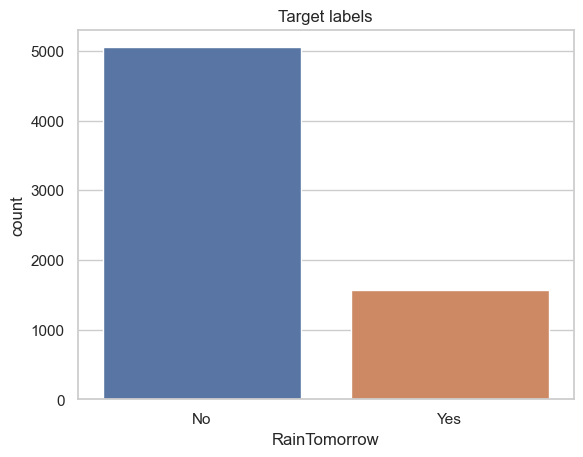

In [7]:
sns.set(style="whitegrid")
sns.countplot(data.RainTomorrow)
plt.title("Target labels")
plt.show()

We can see From above plot that data set is imbalanced

In [8]:
data_yes = data[data['RainTomorrow']=='Yes']
data_no = data[data['RainTomorrow']=='No']

In [9]:
mode_values_for_yes = data_yes.mode()
mode_values_for_yes

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-03-14,PerthAirport,13.2,19.0,0.0,2.6,0.0,N,37.0,N,...,91.0,67.0,1014.1,1011.1,8.0,8.0,14.8,17.0,No,Yes
1,2009-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2009-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2009-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2009-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
mode_values_for_no = data_no.mode()
mode_values_for_no

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2011-01-21,PerthAirport,12.0,20.0,0.0,4.0,11.0,E,35.0,SW,...,68.0,49.0,1020.0,1017.8,1.0,1.0,18.0,19.2,No,No
1,2011-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_no['MaxTemp'].median()

24.1

In [12]:
data_yes['MinTemp'].fillna(value=data_yes['MinTemp'].mode()[0],inplace=True )
data_no['MinTemp'].fillna(value=data_no['MinTemp'].mode()[0],inplace=True )

data_yes['MaxTemp'].fillna(value=data_yes['MaxTemp'].mode()[0],inplace=True )
data_no['MaxTemp'].fillna(value=data_no['MaxTemp'].mode()[0],inplace=True )


data_yes['Temp9am'].fillna(value=data_yes['Temp9am'].mode()[0],inplace=True )
data_no['Temp9am'].fillna(value=data_no['Temp9am'].mode()[0],inplace=True )

data_yes['Temp3pm'].fillna(value=data_yes['Temp3pm'].mode()[0],inplace=True )
data_no['Temp3pm'].fillna(value=data_no['Temp3pm'].mode()[0],inplace=True )


# For humidity also 
data_yes['Humidity9am'].fillna(value=data_yes['Humidity9am'].mode()[0],inplace=True )
data_no['Humidity9am'].fillna(value=data_no['Humidity9am'].mode()[0],inplace=True )



data_yes['Humidity3pm'].fillna(value=data_yes['Humidity3pm'].mode()[0],inplace=True )
data_no['Humidity3pm'].fillna(value=data_no['Humidity3pm'].mode()[0],inplace=True )

# For the rain fall feature we can replace NaN with 0.0 which says there is no rain fall
data_yes['Rainfall'].fillna(value=0.0,inplace=True)
data_no['Rainfall'].fillna(value=0.0,inplace=True)


data_yes['Pressure9am'].fillna(value=data_yes['Pressure9am'].median(),inplace=True )
data_no['Pressure9am'].fillna(value=data_no['Pressure9am'].median(),inplace=True )

data_yes['Pressure3pm'].fillna(value=data_yes['Pressure3pm'].median(),inplace=True )
data_no['Pressure3pm'].fillna(value=data_no['Pressure3pm'].median(),inplace=True )


data_yes['WindSpeed9am'].fillna(value=data_yes['WindSpeed9am'].median(),inplace=True )
data_no['WindSpeed9am'].fillna(value=data_no['WindSpeed9am'].median(),inplace=True )

data_yes['WindSpeed3pm'].fillna(value=data_yes['WindSpeed3pm'].median(),inplace=True )
data_no['WindSpeed3pm'].fillna(value=data_no['WindSpeed3pm'].median(),inplace=True )

#WindGustSpeed -- replacing with median
data_yes['WindGustSpeed'].fillna(value=data_yes['WindGustSpeed'].median(),inplace=True)
data_no['WindGustSpeed'].fillna(value=data_no['WindGustSpeed'].median(),inplace=True)

In [13]:
data_yes.dropna(inplace=True)
data_no.dropna(inplace=True)
data_filled= data_yes.append(data_no, ignore_index=True)
data_filled.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [14]:
print("Percentage of removed points= {}%".format(100.00-(len(data_filled)*100/len(data))))

Percentage of removed points= 53.519668737060044%


In [16]:
data_filled=data_filled.sort_values(by='Date')
data_final = data_filled.drop(['Date', 'Location'], axis=1)
data_final.shape

(3143, 21)

In [18]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Checking outliers

<AxesSubplot:>

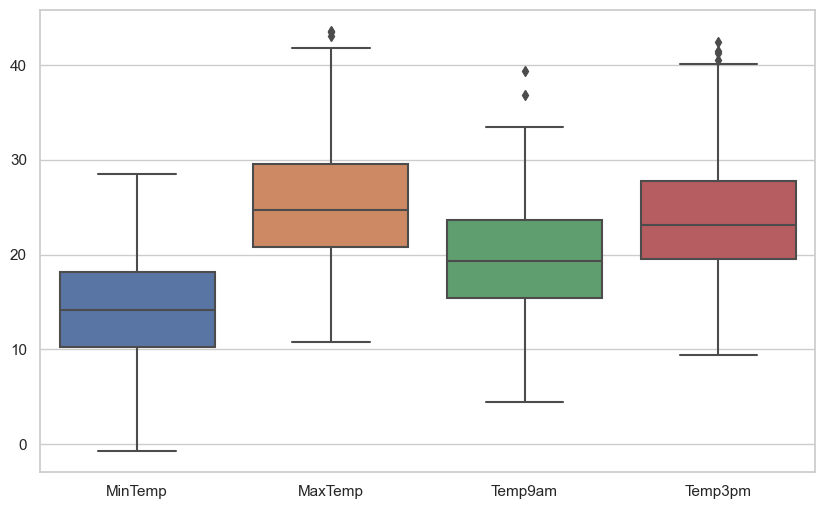

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

In above box plot we can see that all values are meaning full. no outliers found here

<AxesSubplot:>

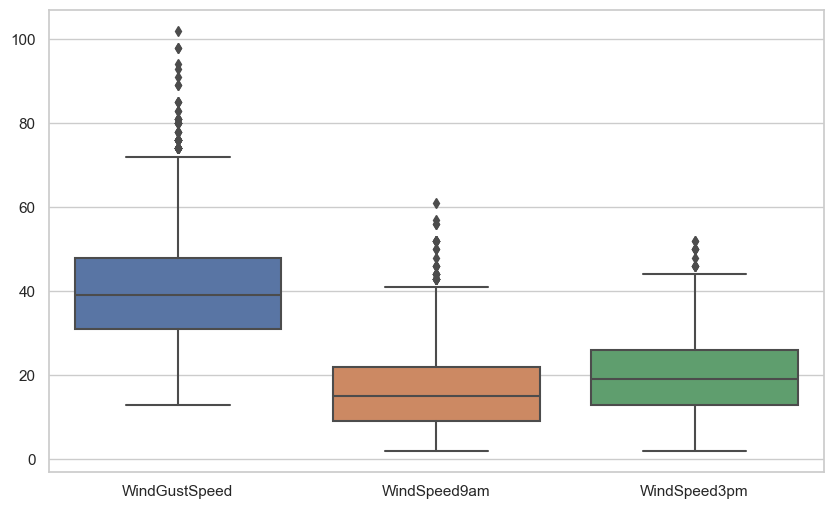

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])

All wind speed values also are in good ranges

<AxesSubplot:>

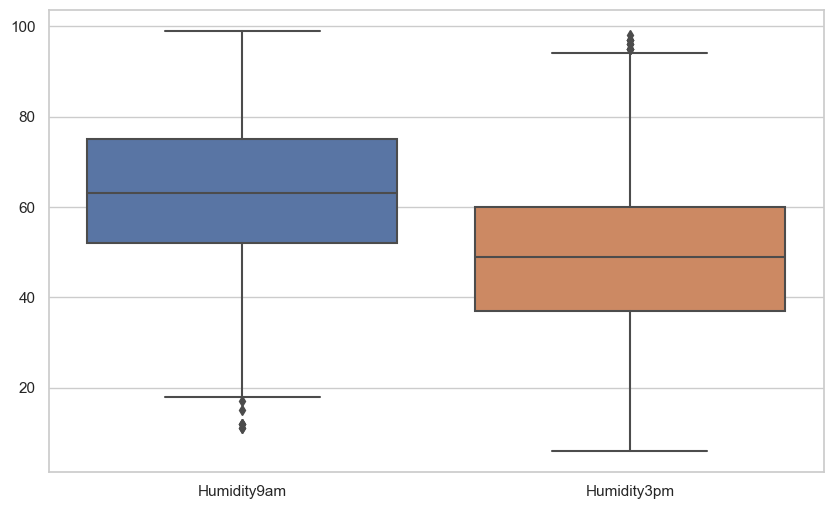

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Humidity9am','Humidity3pm']])

<AxesSubplot:>

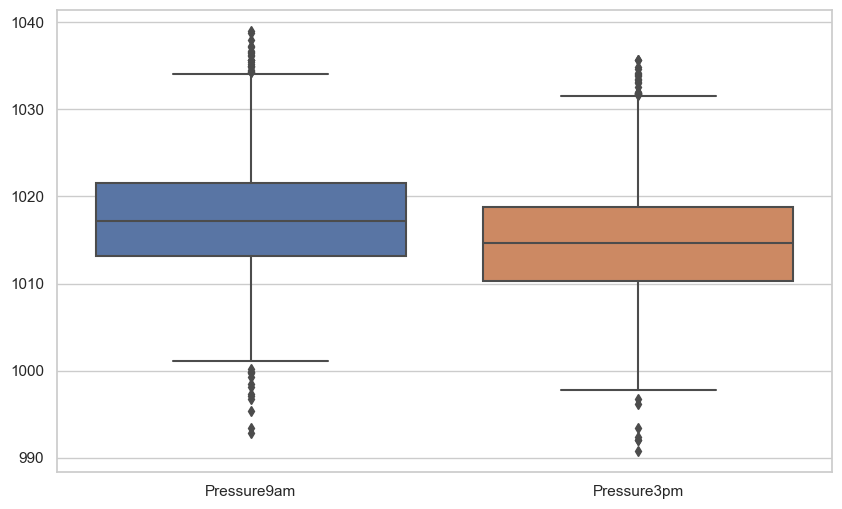

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Pressure9am','Pressure3pm']])

All pressure ranges also in good range

<AxesSubplot:>

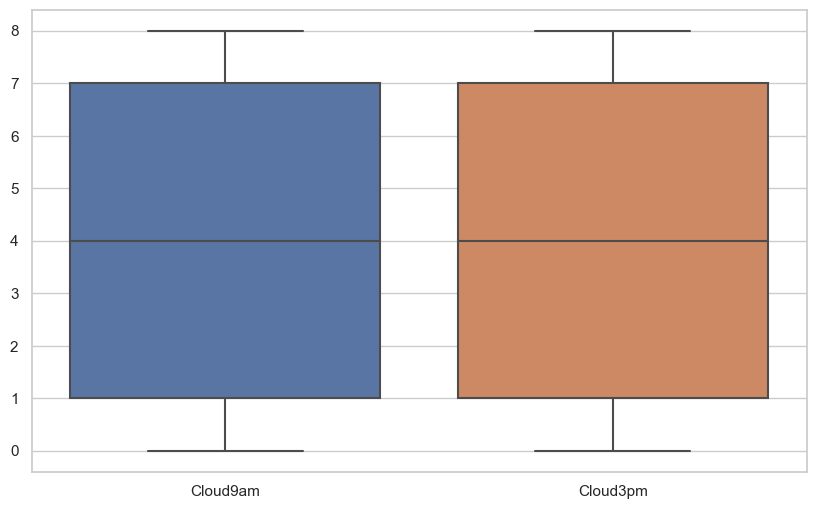

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Cloud9am','Cloud3pm']])

 As we can see that there are some humidity values =0% which is almost never possible, hence removing 0 values

In [24]:
data_final= data_final[data_final['Cloud3pm']!=0.0]
data_final= data_final[data_final['Cloud9am']!=0.0]

<AxesSubplot:>

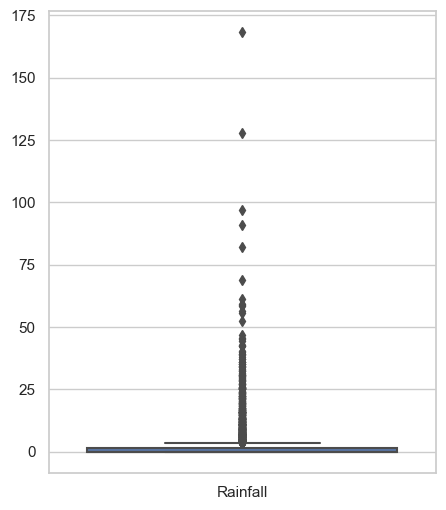

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data_final[['Rainfall']])

<AxesSubplot:>

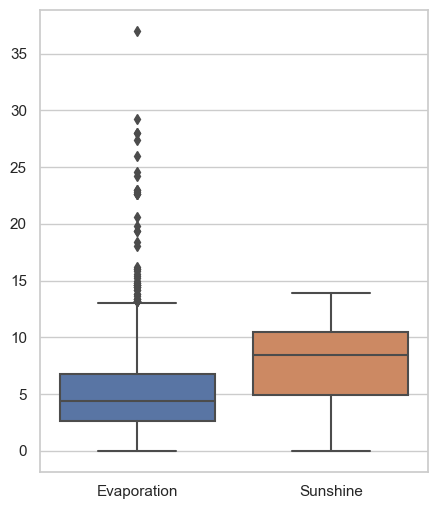

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data_final[['Evaporation','Sunshine']])

Now we can see that data is not suffering from outliers

# Data pre-processing and Feature engineering

In [28]:
WindGustDir_encode = LabelEncoder()
data_final['WindGustDir']=WindGustDir_encode.fit_transform(data_final['WindGustDir'])

WindDir9am_encode = LabelEncoder()
data_final['WindDir9am']=WindDir9am_encode.fit_transform(data_final['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
data_final['WindDir3pm']=WindDir3pm_encode.fit_transform(data_final['WindDir3pm'])

RainToday_encode = LabelEncoder()
data_final['RainToday']=RainToday_encode.fit_transform(data_final['RainToday'])

RainTomorrow_encode = LabelEncoder()
data_final['RainTomorrow']=RainTomorrow_encode.fit_transform(data_final["RainTomorrow"])

In [29]:
Y= data_final['RainTomorrow']
X = data_final.drop(['RainTomorrow'],axis=1)

In [30]:
column_names=X.columns.tolist()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80,shuffle=False)

In [32]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
def plotErrors(k,train,cv):
       
    plt.plot(k, train, label='Train logloss')
    plt.plot(k, cv, label='CV logloss')
    plt.legend()
    plt.xlabel("log(C)= -log(λ)")
    plt.ylabel("Neg_Log Loss")
    plt.title("Error Plot for Train and Validation data")
    plt.grid()
    plt.show()

# Logisitic Regression

# Hyper-parameter tuning

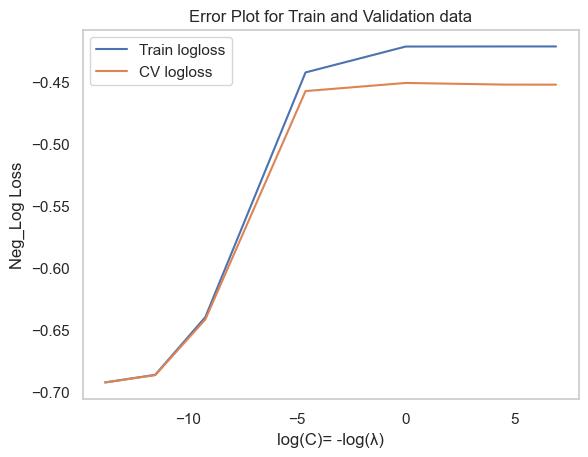

In [35]:
parameters={'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }
log_c = list(map(lambda x : float(math.log(x)),parameters['C']))

clf_log = LogisticRegression(penalty='l2',class_weight='balanced')

clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True)
clf.fit(X_train, y_train)

train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 

plotErrors(k=log_c,train=train_loss,cv=cv_loss)

In [36]:
clf = clf.best_estimator_
clf

LogisticRegression(C=1, class_weight='balanced')

In [37]:
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced')

# Model Evaluating

In [38]:
train_loss = log_loss(y_train, clf.predict_proba(X_train)[:,1])
test_loss  =log_loss(y_test, clf.predict_proba(X_test)[:,1])


print("Log_loss on train data is :{}".format(train_loss))
print("Log_loss on test data is :{}".format(test_loss))

Log_loss on train data is :0.42392565138154176
Log_loss on test data is :0.3727309809088086


In [39]:
clf.coef_[0]

array([-0.49204995, -0.52998934,  0.30907692,  0.26910416, -0.5028781 ,
        0.0411891 ,  0.921909  ,  0.09995965, -0.0096995 , -0.06634801,
       -0.13819168,  0.10446924,  1.27211891,  0.66358409, -0.86955084,
       -0.03910931,  0.43174513,  0.30264206,  0.6625002 ,  0.24358735])

In [40]:
feature_weights=sorted(zip(clf.coef_[0],column_names),reverse = True)

In [41]:
feature_weights

[(1.2721189107293156, 'Humidity3pm'),
 (0.9219089962635517, 'WindGustSpeed'),
 (0.6635840907687278, 'Pressure9am'),
 (0.662500195659266, 'Temp3pm'),
 (0.4317451301715161, 'Cloud3pm'),
 (0.3090769227933374, 'Rainfall'),
 (0.30264206499142354, 'Temp9am'),
 (0.2691041627409693, 'Evaporation'),
 (0.24358734820144282, 'RainToday'),
 (0.1044692437480441, 'Humidity9am'),
 (0.0999596530280951, 'WindDir9am'),
 (0.04118909611114067, 'WindGustDir'),
 (-0.009699500492208309, 'WindDir3pm'),
 (-0.03910931313752296, 'Cloud9am'),
 (-0.0663480071931958, 'WindSpeed9am'),
 (-0.13819168407380694, 'WindSpeed3pm'),
 (-0.49204994780768, 'MinTemp'),
 (-0.5028781019040051, 'Sunshine'),
 (-0.5299893406510515, 'MaxTemp'),
 (-0.8695508377939426, 'Pressure3pm')]

Higher weight value means higher important feature it is.

In [42]:
def will_rain_fall_for_this_conditions(xq):
    
    xq["WindGustDir"]=WindGustDir_encode.transform([xq["WindGustDir"]])
    xq["WindDir9am"]=WindDir9am_encode.transform([xq["WindDir9am"]])
    xq["WindDir3pm"]=WindDir3pm_encode.transform([xq["WindDir3pm"]])
    xq["RainToday"]=RainToday_encode.transform([xq["RainToday"]])
    xq=np.array(list((xq.values())))
    final_xq = scaler.transform(xq.reshape(1, -1))
    chance=clf.predict_proba(final_xq)[:,1]
    if chance>=0.5:
        print("Yes, there is a {} % chance of rain can fall on tommorow ".format(chance*100))
    else:
        print("No, there is only {}% chance of rainfall hence we cannot expect rain on tommorow ".format(chance*100))
    print("Because today's Humidity at 3pm ={}%,Atmosphereic Pressure at 9am={}millibars,and Wind Gust Speed ={}km/hr, which are very good sign for rainfall"
          .format(Humidity3pm,Pressure9am,WindGustSpeed)) 

In [44]:
MinTemp   = 26.2
MaxTemp   = 31.7
Rainfall   = 2.8
Evaporation   = 5.4
Sunshine   = 3.5
WindGustDir   = "NNW"
WindGustSpeed   = 57
WindDir9am   = "NNW"
WindDir3pm   = "NNW"
WindSpeed9am   = 20
WindSpeed3pm   = 13
Humidity9am   = 81
Humidity3pm   = 95
Pressure9am   = 1007.2
Pressure3pm   = 1006.1
Cloud9am   = 7
Cloud3pm   = 8
Temp9am   = 28.8
Temp3pm   = 25.4
RainToday   ="Yes"

In [45]:
point = [MinTemp,MaxTemp,Rainfall,
         Evaporation,Sunshine,WindGustDir,
         WindGustSpeed,WindDir9am,WindDir3pm,
         WindSpeed9am,WindSpeed3pm,Humidity9am,
         Humidity3pm,Pressure9am,Pressure3pm,
         Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday]

xq=dict()
for i,name in enumerate(column_names):
    xq[name]=point[i]

In [46]:
will_rain_fall_for_this_conditions(xq)

Yes, there is a [99.02984367] % chance of rain can fall on tommorow 
Because today's Humidity at 3pm =95%,Atmosphereic Pressure at 9am=1007.2millibars,and Wind Gust Speed =57km/hr, which are very good sign for rainfall
